# TensorFlow

TensorFlow is a library developed by the team of Google that can be used to program various machine learning/deep learning algorithms. Tensorflow has its own way to define datatypes, which we must learn in order to program various algorithms. 

`Data Flow Graph` is an important feature of Tensorflow. This concept defines the operation of a program as a `graph`, where each basic mathematical oepration is a _node_ and the data that undergoes the mathematical operation is a _edge_. More generally, the edges or the datatypes are multidimensional tensors. 

Following is the version of TensorFlow where this tuorial has been tested. 

In [1]:
import tensorflow as tf
print(tf.__version__)

2.8.0


## Work with constants and variables

Let's look at an example. Let's write a code to convert an angle from degrees to radians using standard Python3 and write the same code using tensor flow.

In [2]:
import numpy as np

ang2rad=np.pi/180.0
angle_degrees=45.0
theta=angle_degrees*ang2rad

print(theta)

0.7853981633974483


Now let's learn how write the same code using tensorflow. We will first declare a constant and see how to print it.  In Python3, what we would do is the following.

In [3]:
pi=np.pi

print(pi)

3.141592653589793


In TensorFlow, you have to define all your data as a constant or a variable. So, we can try the following code.

In [4]:
pi=tf.constant(np.pi)

print(pi)

tf.Tensor(3.1415927, shape=(), dtype=float32)


Now you can see that the constant is stored as a Tensor (with the shape of a scalar) but the output is not as expected. Suppose we only want to see the number `3.1415927` as the output, you can try the following

In [5]:
pi=tf.constant(np.pi)
print(pi.numpy())

3.1415927


You must have noticed that our result using standard Python has more significant figure, `3.141592653589793`, than the result printed using TensorFlow, `3.1415927`. We can provide another argument `dtype` as we have done for `numpy` and state that we are interested in a 64-bit float.

In [6]:
pi=tf.constant(np.pi,dtype=tf.float64)
print(pi.numpy())

3.141592653589793


Now, let's move to writing the entire code to convert the angle from degrees to radian

In [7]:
# Build a dataflow graph.
ang2rad = tf.constant(np.pi/180.0,dtype=tf.float64)       # Edge
angle_degrees= tf.constant(45.0,dtype=tf.float64)         # Edge
theta=tf.multiply(angle_degrees,ang2rad)                  # Node connecting the 2 edges

print(theta.numpy())

0.7853981633974483


Or, simply

In [8]:
ang2rad = tf.constant(np.pi/180.0,dtype=tf.float64)       # Edge
angle_degrees= tf.constant(45.0,dtype=tf.float64)         # Edge
theta=angle_degrees*ang2rad

print(theta.numpy())

0.7853981633974483


Let's declare `angle_degrees` as a variable because, in particle, this is how we might use this piece of code. For every angle in degrees, we may want a value in radian.

In [9]:
ang2rad = tf.constant(np.pi/180.0,dtype=tf.float64)                 
angle_degrees= tf.Variable(initial_value=45.0,dtype=tf.float64)  

theta=angle_degrees*ang2rad 
print(theta.numpy())

0.7853981633974483


Now, we can write a function and run a TensorFlow session in it and use it in Python.

In [10]:
import tensorflow as tf

def tf_deg2rad(angle):    
    
    ang2rad = tf.constant(np.pi/180.0,dtype=tf.float64)  
    angle_degrees= tf.Variable(initial_value=angle,dtype=tf.float64)
    theta=ang2rad*angle_degrees
    result = theta.numpy()
        
    return result

In [11]:
for angle in [30,45,60,90,180]:
    print(tf_deg2rad(angle))

0.5235987755982988
0.7853981633974483
1.0471975511965976
1.5707963267948966
3.141592653589793


## Working with tensors

In [12]:
import tensorflow as tf
import numpy as np

a = np.array([1,4,9],dtype='float64') # Numpy array

tf_a=tf.constant(a) # TensorFlow tensor

print(tf_a)

print('No. of dimensions:',tf_a.ndim)
print('Shape:',tf_a.shape)

tf.Tensor([1. 4. 9.], shape=(3,), dtype=float64)
No. of dimensions: 1
Shape: (3,)


In [13]:
sum_a = tf.math.reduce_sum(tf_a)
    
print(sum_a.numpy())

14.0


In [14]:
prod_a = tf.math.reduce_prod(tf_a)
    
print(prod_a.numpy())

36.0


In [15]:
a = np.array([1,1,1],dtype='float64') 
tf_a=tf.constant(a)

b = np.array([1,4,9],dtype='float64') 
tf_b=tf.constant(b) 

tf_c=tf_a+tf_b

print(tf_c.numpy())

[ 2.  5. 10.]


## Automatic differentiation

Optimization of a model depends 

In [65]:
import tensorflow as tf

pi=[]
trials=[]
for N_trials in range(1,5000,1000):
    
    trials.append(N_trials)

    Area_sq=0
    Area_cir=0

    for i in range(N_trials):
        x_rand=tf.random.uniform([1],minval=[-1],maxval=[1],dtype='float64')
        x=x_rand.numpy()
        y_rand=tf.random.uniform([1],minval=[-1],maxval=[1],dtype='float64')
        y=y_rand.numpy()
    
        Area_sq=Area_sq+1
    
        if x**2 + y**2 < 1:
            Area_cir=Area_cir+1  
    
    pi.append(4*Area_cir/Area_sq)

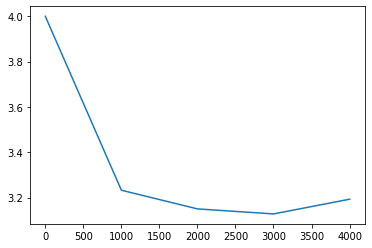

In [66]:
import matplotlib.pyplot as plt
plt.plot(trials,pi)
plt.show()